# Data Integration : Joining (Merging) Different Sources
### Why?
Consider this:
* Which department in your organization is likely to have CUSTOMER table or information? Marketing dept
* Which department in your organization is likely to have ORDER table or information? Supply chain / Operations management dept
* To find out “valuable customers”, you need to “merge” various data sources and have “a single truth” (= a single database or table)
* Joining different data sources provides more insights about consumers, products, markets, and other areas/topics. This is an important skill for “everyone”

### How?
You can acquire datasets from different data sources, including social media websites, data brokers, data service providers, etc. Then, use one of these **join** methods

* inner join (most common)
* left join 
* right join

<img src="images\ppt\Slide10.gif">
In this example, DepartmentID is called "**the primary key**" or "**the common key**". This column is used to join two datasets.

<img src="images\ppt\Slide11.gif">
<img src="images\ppt\Slide12.gif">

Resources on Joining Datasets using Python Pandas
* http://pandas.pydata.org/pandas-docs/stable/merging.html

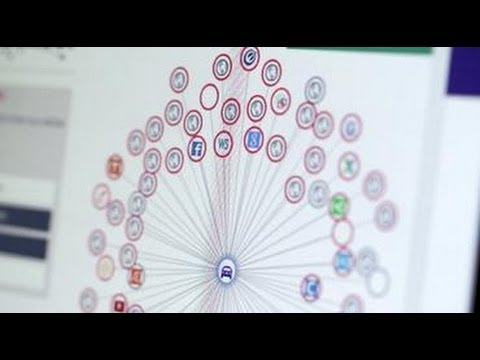

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("_Cty7ctycsI")

In [4]:
# import packages
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

In [5]:
# read data
df1 = pd.read_excel('data/customertable.xls')
df1

,CustomerID,FirstName,LastName,Email,DOB,Phone
0,1,John,Smith,John.Smith@yahoo.com,24872,626 222-2222
1,2,Steven,Goldfish,goldfish@fishhere.net,27123,323 455-4545
2,3,Paula,Brown,pb@herowndomain.org,28634,416 323-3232
3,4,James,Smith,jim@supergig.co.uk,20/10/1980,416 323-8888


In [7]:
df2 = pd.read_excel('data/salestable.xls')
df2

,CustomerID,Date,SaleAmount
0,2,2004-05-06,100.22
1,1,2004-05-07,99.95
2,3,2004-05-07,122.95
3,3,2004-05-13,100.00
4,4,2004-05-22,555.55
5,5,2004-05-23,1000.00
6,6,2004-05-24,2000.00


CustomerID is called "**the primary key**" or "**the common key**". This column is used to join two datasets.

In [9]:
#when we say "join", we're referring to this type of join (inner join)
df1.merge(df2, on="CustomerID")
#sames as 
# df1.merge(df2, on='CustomerID', how='inner')

,CustomerID,FirstName,LastName,Email,DOB,Phone,Date,SaleAmount
0,1,John,Smith,John.Smith@yahoo.com,24872,626 222-2222,2004-05-07,99.95
1,2,Steven,Goldfish,goldfish@fishhere.net,27123,323 455-4545,2004-05-06,100.22
2,3,Paula,Brown,pb@herowndomain.org,28634,416 323-3232,2004-05-07,122.95
3,3,Paula,Brown,pb@herowndomain.org,28634,416 323-3232,2004-05-13,100.00
4,4,James,Smith,jim@supergig.co.uk,20/10/1980,416 323-8888,2004-05-22,555.55


In [10]:
#in this example, the result of left join is same as that of regular (or inner) joing
df1.merge(df2, on = "CustomerID", how = "left")

,CustomerID,FirstName,LastName,Email,DOB,Phone,Date,SaleAmount
0,1,John,Smith,John.Smith@yahoo.com,24872,626 222-2222,2004-05-07,99.95
1,2,Steven,Goldfish,goldfish@fishhere.net,27123,323 455-4545,2004-05-06,100.22
2,3,Paula,Brown,pb@herowndomain.org,28634,416 323-3232,2004-05-07,122.95
3,3,Paula,Brown,pb@herowndomain.org,28634,416 323-3232,2004-05-13,100.00
4,4,James,Smith,jim@supergig.co.uk,20/10/1980,416 323-8888,2004-05-22,555.55


In [11]:
df1.merge(df2, on = "CustomerID", how = "right")

,CustomerID,FirstName,LastName,Email,DOB,Phone,Date,SaleAmount
0,1,John,Smith,John.Smith@yahoo.com,24872,626 222-2222,2004-05-07,99.95
1,2,Steven,Goldfish,goldfish@fishhere.net,27123,323 455-4545,2004-05-06,100.22
2,3,Paula,Brown,pb@herowndomain.org,28634,416 323-3232,2004-05-07,122.95
3,3,Paula,Brown,pb@herowndomain.org,28634,416 323-3232,2004-05-13,100.00
4,4,James,Smith,jim@supergig.co.uk,20/10/1980,416 323-8888,2004-05-22,555.55
5,5,NaN,NaN,NaN,NaN,NaN,2004-05-23,1000.00
6,6,NaN,NaN,NaN,NaN,NaN,2004-05-24,2000.00


In [12]:
# is outer join (same as right join)
df1.merge(df2, on = "CustomerID", how = "left")
# same as 
# df1.merge(df2, on='CustomerID', how='right')

,CustomerID,FirstName,LastName,Email,DOB,Phone,Date,SaleAmount
0,1,John,Smith,John.Smith@yahoo.com,24872,626 222-2222,2004-05-07,99.95
1,2,Steven,Goldfish,goldfish@fishhere.net,27123,323 455-4545,2004-05-06,100.22
2,3,Paula,Brown,pb@herowndomain.org,28634,416 323-3232,2004-05-07,122.95
3,3,Paula,Brown,pb@herowndomain.org,28634,416 323-3232,2004-05-13,100.00
4,4,James,Smith,jim@supergig.co.uk,20/10/1980,416 323-8888,2004-05-22,555.55


In [13]:
# save the results of join
df_new = df1.merge(df2, on = "CustomerID", how = "left")
df_new.to_csv("data/df_new.csv")